<a href="https://colab.research.google.com/github/henok-bot/EPIDEMIA_simulation/blob/main/Henok_Module_3_2_Using_ClimateSERVpy_to_Request_and_Visualize_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

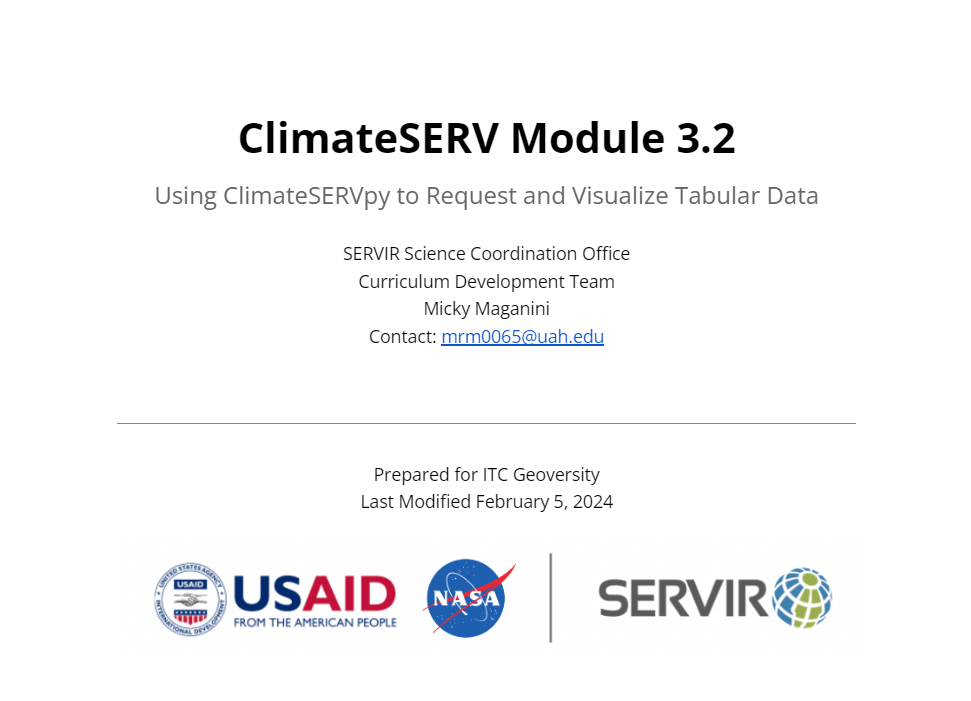

Welcome to Module 3.2! This is a template notebook to help you get started using ClimateSERVpy.

#**IMPORTANT** : Before going further, click **File** --> **Save A Copy in Drive**. Then, please exit out of the original copy and give the file a new name in your Google Drive.

In part 1 of this notebook, we will install the ClimateSERVpy API package and "Mount" your Google Drive, which will allow you to download data from ClimateSERV to your Google Drive.

Part 2 provides a guide on how to use ClimateSERVpy's `request_data` method, which allows you to implement the full functionality of the ClimateSERV GUI in a Python environment.



---
# **Part 1: Installing Packages and Mounting Google Drive**

We will begin by installing ClimateSERV in Google Colaboratory.

In [ ]:
!pip install climateserv

Now that we have installed climateserv, we can import the api package into this notebook to request data from ClimateSERV.

In [ ]:
import climateserv.api
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

After you run the code cell below, a pop-up window will display. Click **Connect to Google Drive**, then follow the instructions on screen to complete the mounting process.

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


We can now use the `cd` command in Python, which stands for "choose directory", to navigate to a Google Drive folder of our choice. If you get an error when running the below cell that says "Transport endpoint is not connected", go to the menu at the top and click *Runtime* / *Disconnect and delete runtime*. Then run all of the cells from the beginning of the notebook.

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


We will now use the `os.mkdir()` method to make a new directory (or folder) within our Google Drive. If you already have a folder called "climateserv_exports" within your drive, you will get an error saying that the folder already exists. If this is the case, you can simply skip to the next cell. For more information regarding selecting your working directory in Google Colab, visit [this site](https://saturncloud.io/blog/how-to-change-the-path-in-google-colab/#:~:text=One%20of%20the%20simplest%20ways,the%20current%20working%20directory%20instantly.).


In [ ]:
os.mkdir("climateserv_exports")

FileExistsError: [Errno 17] File exists: 'climateserv_exports'

In [ ]:
cd climateserv_exports

/content/drive/MyDrive/climateserv_exports


We can use the `pwd` command, which stands for "print working directory", to see our current directory or folder, which is now our climateserv folder

In [ ]:
pwd

'/content/drive/MyDrive/climateserv_exports'

We can use the `ls` command to list the files that are in our current directory. This is helpful in ClimateSERV because it allows us to check and make sure data we requested from climateSERV is actually in our directory.

If we are in an empty folder in Google Drive, the code cell below will run, but will not print anything to the console. We can see that will change later on in this Module as we import data from ClimateSERV to this folder.

In [ ]:
ls

forecasted_precip.csv     hydrafloods_case_study.tif  imerg_precip.csv
forecasted_precip.gsheet  imerg_precip_2.csv          imerg_precip.gsheet


---
# **Part 2: Requesting Data from ClimateSERV**

Below you can find a generic code block that can be used to request data from ClimateSERV.

In order to request data from ClimateSERV, we need to define a set of parameters to give to the `climateserv.api.request_data` method. These parameters include a region of interest (`geometry`), a dataset of interest (`dataset`), a time period of interest (`start_date` and `end_date`), a spatial reducer (`reducer`), an output path (`outfile`) to write our data to. If we are requesting the NMME forecast data, we also need to specify the forecast ensemble we want to use (`ensemble`) as well as which variable we are requesting (`variable`).

You can find more information for how each parameter should be defined in the appendix towards the bottom of this document.

In [ ]:
geometry = [[103.046, 11.679], [103.046, 13.539], [105.617, 13.539], [105.617, 11.679]]
dataset = 'IMERG'
operation_type = 'Average'
start_date = "09/01/2015"
end_date = "10/15/2015"
ensemble = ''
variable = ''
outfile = 'imerg_precip_2.csv'

If you did not change any of the above variables, you can run the code cell below as is. You will then receive feedback from ClimateSERV that will tell you if you were successful in requesting your data

In [ ]:
climateserv.api.request_data(dataset, operation_type, start_date, end_date,
                             geometry, ensemble, variable, outfile)

New Script Run, Dataset: IMERG
Error submitting data request: 500 Server Error: Internal Server Error for url: https://climateserv.servirglobal.net/api/submitDataRequest/?datatype=IMERG&seasonal_ensemble=&seasonal_variable=&begintime=09%2F01%2F2015&endtime=10%2F15%2F2015&intervaltype=0&operationtype=5&dateType_Category=default&isZip_CurrentDataType=False&geometry=%7B%22type%22%3A%22Polygon%22%2C%22coordinates%22%3A%5B%5B%5B103.046%2C11.679%5D%2C%5B103.046%2C13.539%5D%2C%5B105.617%2C13.539%5D%2C%5B105.617%2C11.679%5D%5D%5D%2C%22properties%22%3A%7B%7D%7D
Response text: No response


Now that we have downloaded the data from climateserv to our Google Drive, let's again use the `ls` method to list the files in our working directory

In [ ]:
ls

as we can see, our data has been successfully added to our console. Let's bring it into this notebook for visualization. I will use the `np.loadtxt` method, but you can use any file-reading library (Pandas is a popular one).

In [ ]:
lmb = np.loadtxt(outfile, dtype = 'str', unpack = True, delimiter = ',', skiprows = 2)
date = lmb[0]
precip = lmb[1]

length = len(date)
date_list = []
precip_list = []

for i in range(length):
  date_list.append(i)
  precip_list.append(float(precip[i]))

In [ ]:
import matplotlib.pyplot as plt

xlab = 'Days since September 01, 2019'
ylab = 'Precipitation [10ths of a millimeter]'
title_string = 'IMERG precipitation'
plt.plot(date_list, precip_list, '-b', markersize = 1)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title_string)
plt.grid()

# **Part 4: Try it yourself!**

In [ ]:
geometry_2 =
dataset_2 =
operation_type_2 =
start_date_2 =
end_date_2 =
ensemble_2 =
variable_2 =
outfile_2 =

In [ ]:
climateserv.api.request_data(dataset_2, operation_type_2, start_date_2, end_date_2, geometry_2, ensemble_2, variable_2, outfile_2)

Run ls to make sure the data we requested is appearing in our Google Drive.

In [ ]:
ls

In [ ]:
lmb = np.loadtxt(outfile_2, dtype = 'str', unpack = True, delimiter = ',', skiprows = 2)
date = lmb[0]
precip = lmb[1]

length = len(date)
date_list = []
precip_list = []

for i in range(length):
  date_list.append(i)
  precip_list.append(float(precip[i]))

In [ ]:
xlab = 'Days since [Enter Date Here]'                    # May have to change this label depending on the temporal resolution of your dataset.
ylab = '[Enter Variable and Unit here]'                     # May have to change this label depending on the units of your dataset.
title_string = '[Enter a Title for your Data here]'                     # May have to change this label depending on which dataset you requested.
plt.plot(date_list, precip_list, '-b', markersize = 1)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title_string)
plt.grid()

# **Appendix: Arguments for the api_request_data Method**

This appendix provides more information regarding each argument to the `climateserv.api_request_data` method. Each heading below is an argument that can be given to ClimateSER. The text in parentheses next to the Argument specifies how we defined this parameter in this notebook. You can find more information regarding the ClimateSERVpy API on [this website](https://pypi.org/project/climateserv/).


**Dataset of Interest (`dataset`):**

This parameter must be fed as a string to the `request_data` method in ClimateSERV. Each dataset within climateserv has a specific string associated with it, which can be found in the [ClimateSERV Dataset Encyclopedia.](https://docs.google.com/document/d/17u7V5wlqEDVNv2v48m_crsk66D0Rd4nwpeg3BnlRkgU/edit?usp=sharing)

* `"IMERG_early"`: NASA-IMERG Early 1 day
* `"IMERG"`: NASA-IMERG Late 1 Day
* `"ESI_12"`: SPoRT Evaporative Stress Index 12-Weeek
* `"ESI_4"`:SPoRT Evaporative Stress Index 4-Week
* `"USDA_SMAP"`: USDA SMAP Soil Moisture Profile
* `"USDA_SSSM"`: USDA SMAP Subsurface Soil Moisture
* `"USDA_SSSMA"`: USDA SMAP Subsurface Soil Moisture Anomlay
* `"USDA_SSM"`: USDA Surface Soil Moisture
* `"USDA_SSMA"`: USDA Surface Soil Moisture Anomaly
* `"CHIRP"`: UCSB CHIRP Rainfall
* `"CHIRPS"`: UCSB CHIRPS Rainfall with Stations
* `"CentralAsia_eMODIS"`: USGS eMODIS NDVI Central Asia
* `"EastAfrica_eMODIS"`: USGS eMODIS NDVI East Africa
* `"SouthAfrica_eMODIS""`: USGS eMODIS NDVI Southern Africa
* `"WestAfrica_eMODIS"`: USGS eMODIS NDVI West Africa
* `"CHIRPS_GEFS_precip_mean"`: UCSB CHIRPS-GEFS 10-day forecast mean precipitation
* `"CHIRPS_GEFS_anom"`: UCSV CHIRPS-GEFS 10-day forecast mean anomaly
* `"CCSM4"`: NMME Community Climate System Model version 4
* `"CFSV2"`: NMME Climate Forecast Model Version 2
* Datasets that are Not Available in ClimateSERVpy API as of February 14, 2024:
  * NSIDC SMAP Dataset
  * LIS Datasets

**Operation Type (`operation_type`)**
ClimateSERVpy allows you to download data as tabular data or the raw raster data. The Tabular data provides timeseries information in the form of a .csv file. If you are requesting tabular data, as we are in this case, we need to pick a sptial reducer which will determine  how ClimateSERV will spatially reduce your data such that you have one value per date that represents your region of interest.

If downloading tabular data, set `operation_type` to be one of the following strings:
* `"Average"` will return the average value over all the pixels in your region of interest for each date.
* `"Min"` will return the minimum value over all the pixels in your region of interest for each date.
* `"Max"` will return the maximum value over all the pixels in your region of interest for each date.

If downloading raster data, set `operation_type` to be one of the following strings

* `"Download"`: Will Download your data as a .zip file of tifs
* `"NetCDF"`: will download your data as a NetCDF (.nc) file

**Start Date (`start_date`)**:

Your time period will be specified by two parameters, both of which will be strings (text enclosed with quotation marks). One parameter will outline the starting date of your period of interest in "MM/DD/YYYY" format.

**End Date (`end_date`)**:

Your time period will be specified by two parameters, both of which will be strings (text enclosed with quotation marks). One parameter will outline the starting date of your period of interest in "MM/DD/YYYY" format.

**Region of Interest (`geometry`):**

This parameter must be fed as a two-dimensional list of ordered coordinate pairs that outline a polygon (i.e. `[[lon_1, lat_1], [lon_2, lat_2], ..., [lon_x, lat_x] etc.])` where `lon_x and lat_x` are the longitudes and latitudes of each point, respectively.

**Seasonal Ensemble (`ensemble`):**
This parameter will be an empty string (`''`) unless your `dataset` was the NMME `'CFSV2'` or NMME `'CCSM4'` datasets. If your dataset was one of these datasets, your ensemble variable can be:

* For CSFV2, your variable can be `ens01` - `ens24`, e.g.:
  * `ens01`
  * `ens02`
  * `ens03`
  * ...
  * `ens24`
* For CCSM4, your variable can be `ens01` - `ens10`, e.g.:
  * `ens01`
  * `ens02`
  * `ens03`
  * ...
  * `ens10`

**Seasonal Variable (`variable`)**:

This parameter will be an empty string (`''`) unless your `dataset` was the NMME `'CFSV2'` or NMME `'CCSM4'` datasets. If your dataset was one of these datasets, your ensemble variable can be: `Temperature` or `Precipitation`.



**Output Path** (`outfile`)

This parameter will consist of a string that outlines the file name and file format you wish to request the data from ClimateSERV as. You can name the file whatever you want, but you must include one of the following file extensions at the end of your file name. The file extension will depend on the parameter you gave to the `operation_type` argument.

If your operation type was 'max', 'min', or 'average' (i.e. you were requesting tabular data), your output path must end with: `'.csv'`: Comma Separated Value File

If your operation type was 'Download', (i.e. you were requesting raster data) your output path must end with `'.zip'` , which will contain a a zip folder containing Tagged Image (.tif) files.



